In [ ]:
cd drive/My\ Drive/suyash

/content/drive/My Drive/suyash


In [ ]:
#import the necessary libraries
import tensorflow as tf
import numpy as np
from math import pi
import complex_conv
import activations
import os
import time
from matplotlib import pyplot as plt
from IPython import display

In [ ]:
#load the dataset path
hpath = '/content/drive/My Drive/suyash/High_Res_Images_small_100/'
hphase = '/content/drive/My Drive/suyash/High_Res_Images_small_100_phase/'
lpath = '/content/drive/My Drive/suyash/Low_Res_Images_small_100/'

In [ ]:
BUFFER_SIZE = 100
BATCH_SIZE = 1
IMG_WIDTH = 256
IMG_HEIGHT = 256

In [ ]:
# function to load the images
def load(image_file):
  image = tf.io.read_file(image_file)
  image = tf.image.decode_png(image)


  real_image = image
  
  real_image = tf.cast(real_image, tf.float32)

  return real_image

(512, 512, 3)


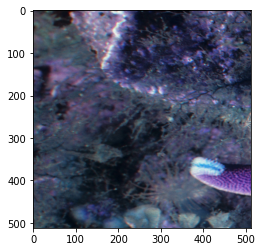

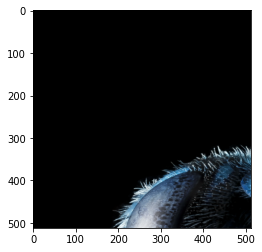

In [ ]:
re = load(hpath+'0.png')
print(re.shape)
re_phase = load(hphase+'0.png')
# casting to int for matplotlib to show the image
plt.figure()
plt.imshow(re/255.0)
plt.figure()
plt.imshow(re_phase/255.0)

In [ ]:
#function to resize the images
def resize(input_image, height, width):
  input_image = tf.image.resize(input_image, [height, width],
                                method=tf.image.ResizeMethod.NEAREST_NEIGHBOR)
  

  return input_image

In [ ]:
#function to crop image to desired size
def random_crop(input_image):
  cropped_image = tf.image.random_crop(
      input_image, size=[2, IMG_HEIGHT, IMG_WIDTH, 3])

  return cropped_image

In [ ]:
def normalize(input_image):
  #input_image = (input_image / 127.5) - 1
  input_image = input_image / 255.0

  return input_image

In [ ]:
@tf.function()
def random_jitter(input_image):
  # resizing to 286 x 286 x 3
  input_image = resize(input_image, 256, 256)

    
  return input_image

In [ ]:
#function to load all images in the dataset and perform image manipulations
def load_image_train(image_file1):
  input_image = load(image_file1)

  input_image = random_jitter(input_image)
  input_image = normalize(input_image)

  return input_image

In [ ]:
#Load High Resolution Amplitude Dataset
train_dataset_h1 = tf.data.Dataset.list_files(hpath+'*.png' , shuffle=False)
train_dataset_h1 = train_dataset_h1.map(load_image_train)
train_dataset_h1 = train_dataset_h1.batch(BATCH_SIZE)

In [ ]:
#Load High Resolution Phase Dataset
train_dataset_h2 = tf.data.Dataset.list_files(hphase+'*.png' , shuffle=False)
train_dataset_h2 = train_dataset_h2.map(load_image_train)
train_dataset_h2 = train_dataset_h2.batch(BATCH_SIZE)

In [ ]:
#Load Low Resolution Amplitude Dataset
train_dataset_l1 = tf.data.Dataset.list_files(lpath+'*.png' , shuffle=False)
train_dataset_l1 = train_dataset_l1.map(load_image_train)
train_dataset_l1 = train_dataset_l1.batch(BATCH_SIZE)

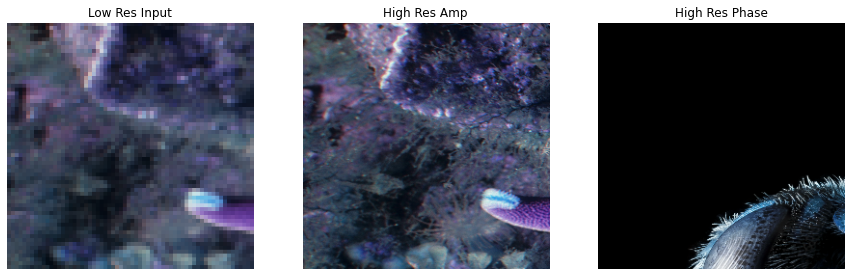

In [ ]:
#displaying the first element of each dataset
for low,hamp,hphase in zip(train_dataset_l1.take(1),train_dataset_h1.take(1),train_dataset_h2.take(1)):
  plt.figure(figsize=(15,15))

  plt.subplot(1,3,1)
  #plt.imshow(low[0]*0.5 +0.5)
  plt.imshow(low[0])
  plt.axis('off')
  plt.title('Low Res Input')
  plt.subplot(1,3,2)
  #plt.imshow(hamp[0]*0.5 +0.5)
  plt.imshow(hamp[0])
  plt.axis('off')
  plt.title('High Res Amp')
  plt.subplot(1,3,3)
  #plt.imshow(hphase[0]*0.5 +0.5)
  plt.imshow(hphase[0])
  plt.axis('off')
  plt.title('High Res Phase')

In [ ]:
#combine the three datasets into one single dataset
train_dataset = tf.data.Dataset.zip((train_dataset_l1, train_dataset_h1,train_dataset_h2))

In [ ]:
#test code for generating phase values
for amp,phase in zip(train_dataset_h1.take(1), train_dataset_h2.take(1)):
  pass
phase = 2*pi*phase
phase = phase/tf.math.reduce_max(phase)


In [ ]:
#function to create a complex object. I=Ae^(iB) where A is the Amplitude Image and B is the Phase Image
def complex_object(amplitude,phase):
  phase = 2*pi*phase
  phase = phase/tf.math.reduce_max(phase)
  r = tf.complex(amplitude, 0.0) * tf.math.exp(tf.complex(0.0,1.0)*tf.complex(phase, 0.0))
  return r

tf.Tensor(
[[[[0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   ...
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]]

  [[0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   ...
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]]

  [[0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   ...
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]]

  ...

  [[0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   ...
   [0.         0.00787402 0.01181102]
   [0.00393701 0.00787402 0.01181102]
   [0.         0.00393701 0.00787402]]

  [[0.         0.         0.      

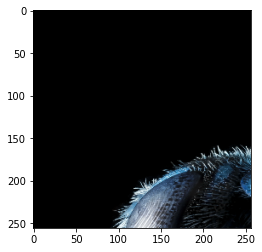

In [ ]:
print(phase)
plt.imshow(phase[0])

In [ ]:
for amp,phase in zip(train_dataset_h1.take(1), train_dataset_h2.take(1)):
  pass
r = complex_object(amp,phase)

In [ ]:
a1 = abs(r)               #amplitude
a2 = tf.math.angle(r)     #phase

Text(0.5, 1.0, 'Phase')

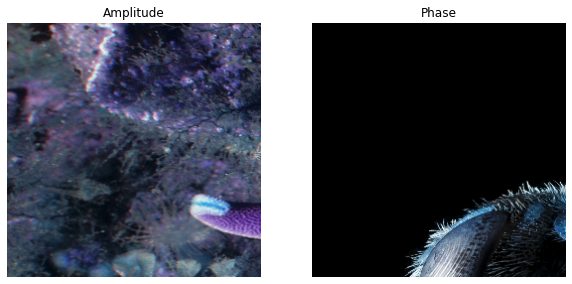

In [ ]:
plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.imshow(a1[0])
plt.axis('off')
plt.title('Amplitude')
plt.subplot(1,2,2)
plt.imshow(a2[0])
plt.axis('off')
plt.title('Phase')

In [ ]:
OUTPUT_CHANNELS = 3
'''
Downsample Block
Consists of a Complex Conv, Complex Batch Normalisation and a modReLU layer. Strided convolution is used for downsampling instead of maxpool due to stability reasons of GAN
'''
def downsample(x,filters, size, apply_batchnorm=True):

  initializer = tf.random_normal_initializer(0., 0.02)
  filters = 2*filters
  result = complex_conv.complex_conv(x,filters,size,stride=2,kernel_initializer=initializer)

  if apply_batchnorm:
    result = complex_conv._batch_norm(result)

  result = activations.modrelu(result)

  return result

In [ ]:
down_model = downsample(a1,3, 4)
print (down_model)

tf.Tensor(
[[[[-0.01008206+0.00748651j  0.02089264-0.02515263j
     0.01252053+0.0312087j ]
   [-0.02279759+0.0241877j  -0.00457752-0.0312611j
     0.01390308+0.01603909j]
   [-0.02098351+0.02359403j -0.00161643-0.02605276j
     0.00983403+0.0137716j ]
   ...
   [-0.02149725+0.02393353j -0.00596053-0.03522606j
     0.0183016 +0.02081344j]
   [-0.0313916 +0.01743786j  0.00043255-0.03514717j
     0.0123346 +0.02270683j]
   [-0.02404913+0.02074125j -0.00523458-0.05386908j
    -0.00579921+0.02823548j]]

  [[-0.04735966-0.00466839j -0.0011773 -0.01908842j
     0.01802999+0.04300538j]
   [-0.06201819+0.0014389j  -0.0401197 -0.00495586j
     0.03552479+0.03315385j]
   [-0.05490347+0.00568951j -0.03368976-0.0075385j
     0.03051848+0.03098227j]
   ...
   [-0.05867641-0.0135064j  -0.03032874-0.00042003j
     0.0389514 +0.04011786j]
   [-0.06707856+0.00314639j -0.05104134-0.01096852j
     0.03839536+0.03193665j]
   [-0.06737848-0.02353002j -0.06757085-0.01172214j
     0.02255229+0.00911589j]]

 

In [ ]:
#define a complex dropout function
def _dropouts(tf_inputs):
  tf_real = tf.math.real(tf_inputs)
  tf_imag = tf.math.imag(tf_inputs)
  drop = tf.keras.layers.Dropout(0.2)
  drop_real = drop(tf_real)
  drop_imag = drop(tf_imag)
  tf_out = tf.complex(drop_real,drop_imag)
  return tf_out

In [ ]:
'''
Upsample Block
Consists of a Complex Transpose Conv, Complex Batch Normalisation and a modReLU layer. 
'''
def upsample(x,filters, size, apply_dropout=False):
  initializer = tf.random_normal_initializer(0., 0.02)
  filters = 2*filters
  result = complex_conv.complex_transposeConv(x,filters, size, stride=2,
                                    kernel_initializer=initializer)

  result = complex_conv._batch_norm(result)
  if apply_dropout:
    result = _dropouts(result)
  result = activations.modrelu(result)

  return result

In [ ]:
up_model=upsample(down_model,3,4)
print(up_model.shape)

(1, 256, 256, 3)


In [ ]:
'''
The Generator model uses a UNet architecture. Skip-connections are used at every upsampling block. 
'''
def Generator():
  inputs = tf.keras.layers.Input(shape=[256,256,3])
  skips=[]
  x = downsample(inputs,64,4, apply_batchnorm=False)  #128x128x64
  skips.append(x)
  x = downsample(x,128,4)                             #64,64,128
  skips.append(x)
  x = downsample(x,256,4)                             #32x32x256
  skips.append(x)
  x = downsample(x,512,4)                             #16x16x512
  skips.append(x)
  x = downsample(x,512,4)                             #8x8x512
  skips.append(x)
  x = downsample(x,512,4)                             #4x4x512
  skips.append(x)
  x = downsample(x,512,4)                             #2x2x512
  skips.append(x)
  x = downsample(x,512,4)                             #1x1x512
  skips.append(x)

  return_skip=[]
  skips = reversed(skips[:-1])
  for skip in skips:
    return_skip.append(skip)
  i=0
  x = upsample(x,512,4,apply_dropout=True)
  x = tf.keras.layers.Concatenate()([x,return_skip[i]])
  i+=1
  x = upsample(x,512,4,apply_dropout=True)
  x = tf.keras.layers.Concatenate()([x,return_skip[i]])
  i+=1
  x = upsample(x,512,4,apply_dropout=True)
  x = tf.keras.layers.Concatenate()([x,return_skip[i]])
  i+=1
  x = upsample(x,512,4,apply_dropout=False)
  x = tf.keras.layers.Concatenate()([x,return_skip[i]])
  i+=1
  x = upsample(x,256,4,apply_dropout=False)
  x = tf.keras.layers.Concatenate()([x,return_skip[i]])
  i+=1
  x = upsample(x,128,4,apply_dropout=False)
  x = tf.keras.layers.Concatenate()([x,return_skip[i]])
  i+=1
  x = upsample(x,64,4,apply_dropout=False)
  x = tf.keras.layers.Concatenate()([x,return_skip[i]])
  i+=1

  initialiser = tf.random_normal_initializer(0.,0.02)
  x = complex_conv.complex_transposeConv(x,6,4,stride=2,kernel_initializer=initialiser)

  
  return tf.keras.Model(inputs=inputs, outputs=x)


tf.Tensor(
[[[[ 5.1603547e-05+1.8685707e-05j -4.1022409e-05-2.6919603e-04j
     9.0977832e-05-9.6699245e-05j]
   [ 1.4348354e-04-6.5302930e-04j -2.6920071e-04+2.9037605e-04j
    -6.9246232e-04-2.3919932e-04j]
   [ 5.4093751e-05+1.7411949e-04j -1.8896484e-04-8.4745907e-04j
     2.8735123e-04-8.8438834e-04j]
   ...
   [-9.3255279e-05+9.0996956e-04j -1.3334730e-04-4.9689680e-04j
     1.3855139e-04+3.5962128e-04j]
   [ 3.7965033e-04+2.6614367e-04j -3.5816536e-04-7.0694520e-04j
    -1.3550278e-04+3.2065451e-05j]
   [-3.8220303e-04+1.6773064e-04j  2.0003968e-04+4.1778208e-04j
    -1.9769433e-05+2.5739198e-04j]]

  [[ 9.0490794e-06+4.1517941e-04j  6.0295651e-04+3.6621199e-04j
    -1.0421654e-04-2.1847163e-04j]
   [ 1.0874590e-03-7.4909918e-04j -1.3635620e-03+2.0414132e-03j
     4.2529262e-04+3.1159012e-04j]
   [-6.4115587e-04-9.8704197e-04j -1.8655611e-03+1.9505284e-03j
    -5.3542142e-04+3.1926029e-05j]
   ...
   [ 1.0397195e-04+2.2806549e-03j -2.6128697e-04+1.3394211e-04j
    -1.1534734e-03

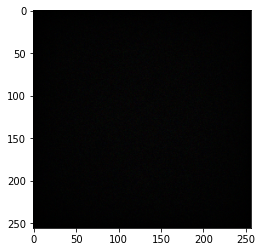

In [ ]:
generator = Generator()
eee = generator(up_model)
print(eee)
plt.imshow(abs(eee[0]))

In [ ]:
LAMBDA = 100

In [ ]:
'''
Define the loss function for a complex valued generator network. The loss is a combination of cross entropy loss between the true output and discriminator 
generated output and the Mean Absolute Error loss between Amplitude and Phase of True and Generated Image.
'''
def generator_loss(disc_generated_output, gen_output, target):
  gan_loss = loss_object(tf.ones_like(disc_generated_output), disc_generated_output)
  # mean absolute error
  l1_loss = tf.reduce_mean(tf.abs(target - gen_output))

  #ft_loss = tf.reduce_mean(tf.math.square(tf.signal.fft(target)-tf.signal.fft(gen_output)))

  real_loss = tf.reduce_mean(tf.abs(abs(target)-abs(gen_output)))
  imag_loss = tf.reduce_mean(tf.abs(tf.math.angle(target)-tf.math.angle(gen_output)))

  total_gen_loss = (1e-3*gan_loss) + (10*imag_loss) + (10*real_loss)
  #total_gen_loss = (gan_loss) + (100*imag_loss) + (100*real_loss)

  return total_gen_loss, gan_loss, l1_loss

In [ ]:
'''
Downsample Block
Consists of a Conv, Batch Normalisation and a Leaky ReLU layer. Strided convolution is used for downsampling instead of maxpool due to stability reasons of GAN
This a real valued downsample block with similar structure to the complex valued downsampler but with real convolutions.
'''
def downsample_real(filters, size, apply_batchnorm=True):
  initializer = tf.random_normal_initializer(0., 0.02)

  result = tf.keras.Sequential()
  result.add(
      tf.keras.layers.Conv2D(filters, size, strides=2, padding='same',
                             kernel_initializer=initializer, use_bias=False))

  if apply_batchnorm:
    result.add(tf.keras.layers.BatchNormalization())

  result.add(tf.keras.layers.LeakyReLU())

  return result

In [ ]:
'''
Discriminator network built as a PatchGAN architecture. The output is a 30x30 receptive field of the original image.
'''
#when feeding target image to Discriminator rememebr to split to dual channels-[real,conv]
def Discriminator():
  initializer = tf.random_normal_initializer(0., 0.02)

  inp = tf.keras.layers.Input(shape=[256, 256, 3], name='input_image')
  tar = tf.keras.layers.Input(shape=[256, 256, 6], name='target_image')

  x = tf.keras.layers.concatenate([inp, tar]) # (bs, 256, 256, channels*2)

  down1 = downsample_real(64, 4, False)(x) # (bs, 128, 128, 64)
  down2 = downsample_real(128, 4)(down1) # (bs, 64, 64, 128)
  down3 = downsample_real(256, 4)(down2) # (bs, 32, 32, 256)

  zero_pad1 = tf.keras.layers.ZeroPadding2D()(down3) # (bs, 34, 34, 256)
  conv = tf.keras.layers.Conv2D(512, 4, strides=1,
                                kernel_initializer=initializer,
                                use_bias=False)(zero_pad1) # (bs, 31, 31, 512)

  batchnorm1 = tf.keras.layers.BatchNormalization()(conv)

  leaky_relu = tf.keras.layers.LeakyReLU()(batchnorm1)

  zero_pad2 = tf.keras.layers.ZeroPadding2D()(leaky_relu) # (bs, 33, 33, 512)

  last = tf.keras.layers.Conv2D(1, 4, strides=1,
                                kernel_initializer=initializer)(zero_pad2) # (bs, 30, 30, 1)

  return tf.keras.Model(inputs=[inp, tar], outputs=last)

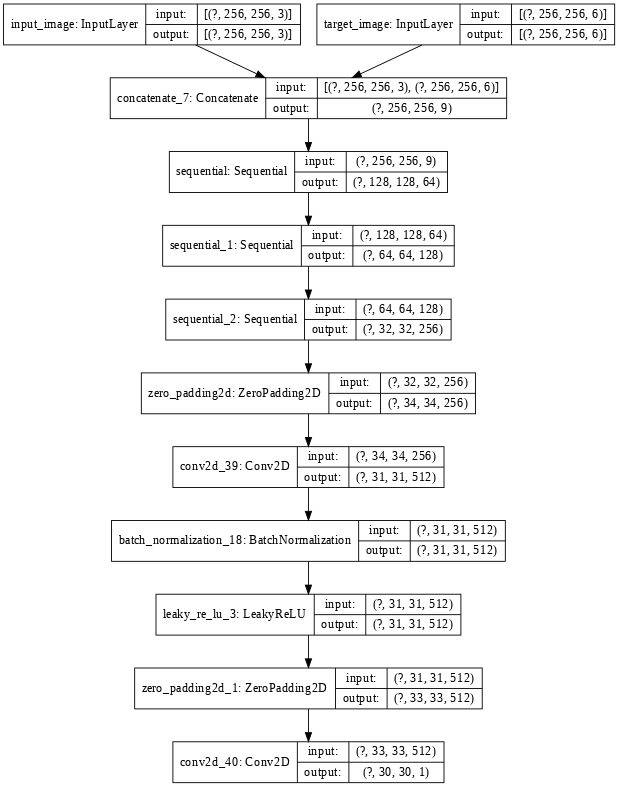

In [ ]:
discriminator = Discriminator()
tf.keras.utils.plot_model(discriminator, show_shapes=True, dpi=64)

In [ ]:
loss_object = tf.keras.losses.BinaryCrossentropy(from_logits=True)

In [ ]:
'''
Discriminator loss function consists of Binary Cross Entropy Loss.
'''
def discriminator_loss(disc_real_output, disc_generated_output):
  real_loss = loss_object(tf.ones_like(disc_real_output), disc_real_output)

  generated_loss = loss_object(tf.zeros_like(disc_generated_output), disc_generated_output)

  total_disc_loss = real_loss + generated_loss

  return total_disc_loss

In [ ]:
generator_optimizer = tf.keras.optimizers.Adam(2e-5, beta_1=0.9)
discriminator_optimizer = tf.keras.optimizers.Adam(2e-5, beta_1=0.9)

In [ ]:
#define training checkpoints
checkpoint_dir = './training_checkpoints'
checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt")
checkpoint = tf.train.Checkpoint(generator_optimizer=generator_optimizer,
                                 discriminator_optimizer=discriminator_optimizer,
                                 generator=generator,
                                 discriminator=discriminator)

In [ ]:
#function to display images during training
def generate_images(model, test_input, tar):
  prediction = model(test_input, training=True)
  plt.figure(figsize=(15,15))

  display_list = [test_input[0], abs(tar[0]),tf.math.angle(tar[0]),abs(prediction[0]),tf.math.angle(prediction[0])]
  title = ['Input Image', 'Ground Truth Amp','Ground Truth Phase', 'Predicted Amp','Predicted Phase']

  for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.title(title[i])
    # getting the pixel values between [0, 1] to plot it.
    plt.imshow(display_list[i])
    plt.axis('off')
  plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


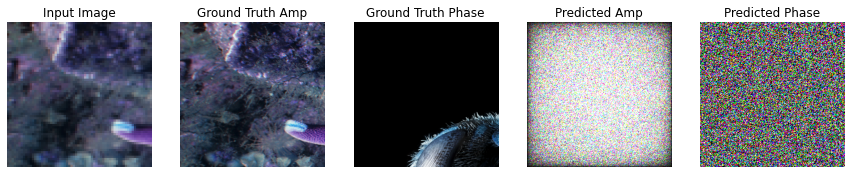

In [ ]:
for example_input, example_target_amp, example_target_phase in train_dataset.take(1):
  #print(example_input, example_target)
  target_object = complex_object(example_target_amp,example_target_phase)
  generate_images(generator, example_input, target_object)

In [ ]:
EPOCHS = 100

In [ ]:
import datetime
log_dir="logs/"

summary_writer = tf.summary.create_file_writer(
  log_dir + "fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))

In [ ]:
@tf.function
def train_step(input_image, target, epoch):
  with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
    gen_output = generator(input_image, training=True)

    disc_target = complex_conv.complex_to_channels(target)
    disc_gen_output = complex_conv.complex_to_channels(gen_output)

    disc_real_output = discriminator([input_image, disc_target], training=True)
    disc_generated_output = discriminator([input_image, disc_gen_output], training=True)

    gen_total_loss, gen_gan_loss, gen_l1_loss = generator_loss(disc_generated_output, gen_output, target)
    disc_loss = discriminator_loss(disc_real_output, disc_generated_output)

  generator_gradients = gen_tape.gradient(gen_total_loss,
                                          generator.trainable_variables)
  discriminator_gradients = disc_tape.gradient(disc_loss,
                                               discriminator.trainable_variables)

  generator_optimizer.apply_gradients(zip(generator_gradients,
                                          generator.trainable_variables))
  discriminator_optimizer.apply_gradients(zip(discriminator_gradients,
                                              discriminator.trainable_variables))

  with summary_writer.as_default():
    tf.summary.scalar('gen_total_loss', gen_total_loss, step=epoch)
    tf.summary.scalar('gen_gan_loss', gen_gan_loss, step=epoch)
    tf.summary.scalar('gen_l1_loss', gen_l1_loss, step=epoch)
    tf.summary.scalar('disc_loss', disc_loss, step=epoch)

In [ ]:
def fit(train_ds, epochs, test_ds=train_dataset):
  for epoch in range(epochs):
    start = time.time()

    display.clear_output(wait=True)

    for example_input, example_target_amp, example_target_phase in test_ds.take(1):
      
      target_object = complex_object(example_target_amp,example_target_phase)
      generate_images(generator, example_input, target_object)
    print("Epoch: ", epoch)

    # Train
    for n, (input_image, target_amp,target_phase) in train_ds.enumerate():
      print('.', end='')
      if (n+1) % 100 == 0:
        print()
      target_object = complex_object(target_amp,target_phase)
      train_step(input_image,target_object , epoch)
    print()

    # saving (checkpoint) the model every 20 epochs
    #if (epoch + 1) % 20 == 0:
     #checkpoint.save(file_prefix = checkpoint_prefix)

    print ('Time taken for epoch {} is {} sec\n'.format(epoch + 1,
                                                        time.time()-start))
 # checkpoint.save(file_prefix = checkpoint_prefix)

In [ ]:
%load_ext tensorboard
%tensorboard --logdir {log_dir}

Reusing TensorBoard on port 6006 (pid 412), started 1:16:31 ago. (Use '!kill 412' to kill it.)

<IPython.core.display.Javascript object>

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


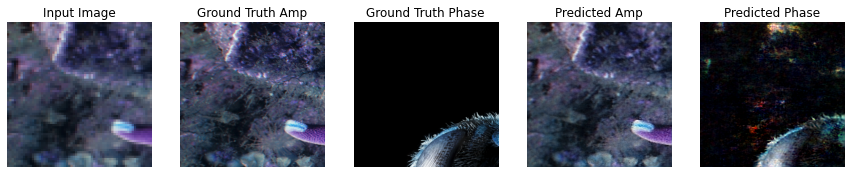

Epoch:  34
......................................................................................

In [ ]:
fit(train_dataset, EPOCHS)